# Import Modules

In [178]:
import tensorflow as tf
print('tensorflow version:', tf.__version__)

import pandas as pd
print('pandas version:', pd.__version__)

import numpy as np
print('numpy version:', np.__version__)

import sklearn
print('sklearn version:', sklearn.__version__)

from sklearn import preprocessing

import matplotlib
print('matplotlib version:', matplotlib.__version__)

import matplotlib.pyplot as plt

tensorflow version: 2.7.0
pandas version: 1.2.4
numpy version: 1.20.1
sklearn version: 0.24.1
matplotlib version: 3.3.4


# Configs

In [57]:
# With numpy, when a value is printed display more values per line
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
np.set_printoptions(linewidth=5000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# In Pandas, display more rows and columns
# https://stackoverflow.com/a/11711637/4375369
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


SEED_FOR_REPRODUCABILITY = 777

# Retrieve Dataset
- Mnist digits

In [21]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

X_train_raw, y_train_raw, X_test_raw, y_test_raw

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

# Prepare the datasets

## Shuffle the data sets
- https://stackoverflow.com/questions/35076223/how-to-randomly-shuffle-data-and-target-in-python

In [95]:
X_train_raw_shuffled, y_train_raw_shuffled = sklearn.utils.shuffle(X_train_raw, y_train_raw, random_state=SEED_FOR_REPRODUCABILITY)
X_test_raw_shuffled, y_test_raw_shuffled = sklearn.utils.shuffle(X_test_raw, y_test_raw, random_state=SEED_FOR_REPRODUCABILITY)

sample_index = 1

X_train_raw[sample_index], y_train_raw[sample_index], X_train_raw_shuffled[sample_index], y_train_raw_shuffled[sample_index],X_test_raw[sample_index], y_test_raw[sample_index], X_test_raw_shuffled[sample_index], y_test_raw_shuffled[sample_index]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 2

In [98]:
y_train_raw_shuffled[sample_index]

8

## Normalize the example data sets

In [96]:
X_train_raw_shuffled_max_value = tf.math.reduce_max(X_train_raw_shuffled)

print("Maximim value:", X_train_raw_shuffled_max_value)

X_train_normalized = X_train_raw_shuffled / X_train_raw_shuffled_max_value
X_test_normalized = X_test_raw_shuffled / X_train_raw_shuffled_max_value

print("Before normalization (training):")
print(X_train_raw_shuffled[sample_index])

print("After normalization (training):")
print(X_train_normalized[sample_index].numpy())

print("Before normalization (test):")
print(X_test_raw_shuffled[sample_index])

print("After normalization (test):")
print(X_test_normalized[sample_index].numpy())

Maximim value: tf.Tensor(255, shape=(), dtype=uint8)
Before normalization (training):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  59 217 162  12  24  22   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 244 254 250 226 254 250 200 106   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  26 216 254 254 175  47  31  31 101 215 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 118 254 161  85  26   0   0   0   0 116 169   0   0   0   0   0

## One-hot encode the label data
- https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

In [114]:

y_train_one_hot_encoded = tf.keras.utils.to_categorical(y_train_raw_shuffled)

y_test_one_hot_encoded = tf.keras.utils.to_categorical(y_test_raw_shuffled)

print('train:')

print(y_train_one_hot_encoded[sample_index], y_train_raw_shuffled[sample_index])

print("test:")    

print(y_test_one_hot_encoded[sample_index], y_test_raw_shuffled[sample_index])

train:
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 8
test:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 6


# Summarize Accepted Data

In [188]:
X_train_accepted = tf.expand_dims(X_train_normalized, axis=-1)
y_train_accepted = y_train_one_hot_encoded

X_test_accepted = tf.expand_dims(X_test_normalized, axis=-1)
y_test_accepted = y_test_one_hot_encoded

# Create the Model Architecture

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_108 (Conv2D)         (60000, 28, 28, 64)       640       
                                                                 
 max_pooling2d_63 (MaxPoolin  (60000, 14, 14, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_109 (Conv2D)         (60000, 14, 14, 64)       36928     
                                                                 
 max_pooling2d_64 (MaxPoolin  (60000, 7, 7, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_110 (Conv2D)         (60000, 7, 7, 64)         36928     
                                                                 
 max_pooling2d_65 (MaxPoolin  (60000, 3, 3, 64)      

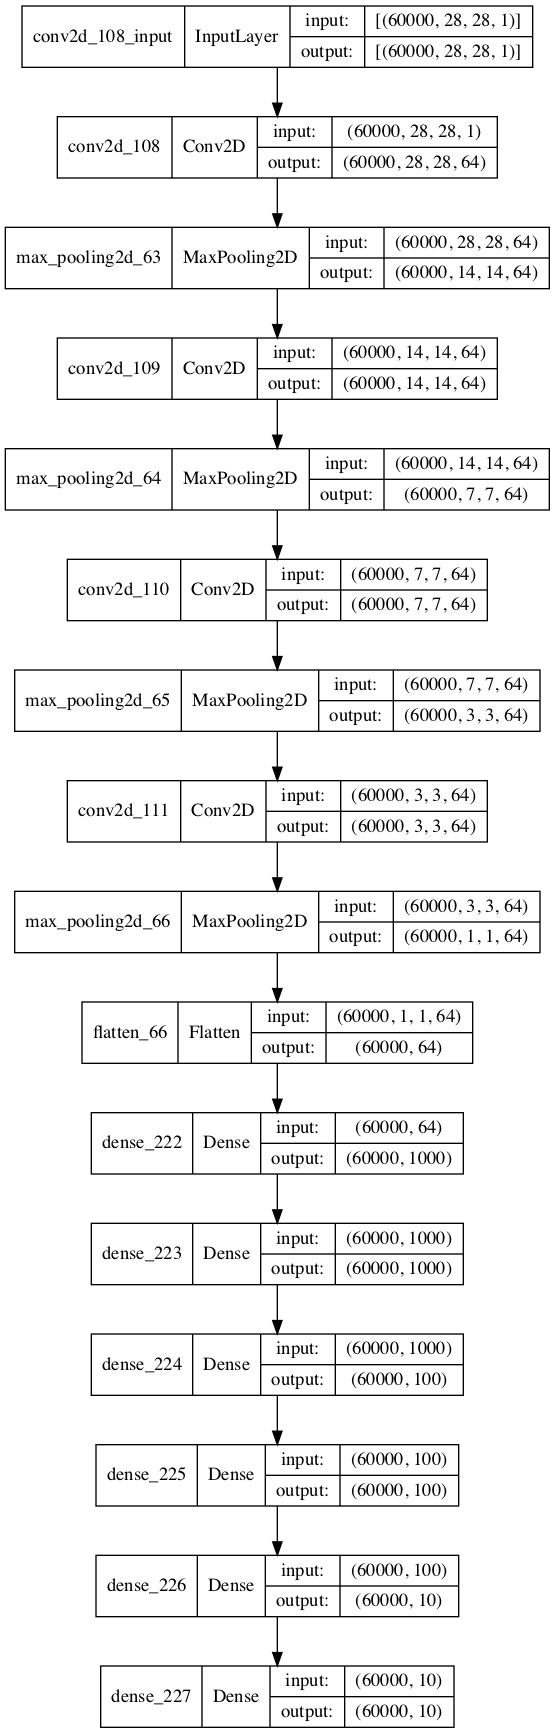

In [251]:
tf.random.set_seed(SEED_FOR_REPRODUCABILITY)

if model_001:
    del(model_001)

model_001 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu, padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu, padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu, padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.relu, padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
#     tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
#     tf.keras.layers.MaxPool2D(
#         pool_size=2,
#         padding="valid"
#     ),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1000, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_001.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[ "accuracy" ]
)

model_001.build(input_shape=X_train_accepted.shape)

model_001.summary()
tf.keras.utils.plot_model(model_001, show_shapes=True)

# Fit the Architecture to the Data
- Do the training

In [252]:
def scheduler(epoch, lr):
    print('learning rate', lr, 'epoch', epoch)
    
    return 0.001
    
    if epoch < 10:
        return 0.001
    else:
        return 0.0001
#     elif epoch < 10:
#         return 0.0001
#     elif epoch < 15:
#         return 0.00001
#     elif epoch < 20:
#         return 0.000001
#     else:
#         return 0.0000001


learning_rate_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model_001_history = model_001.fit(
    X_train_accepted,
    y_train_accepted,
    validation_data=(X_test_accepted, y_test_accepted),
    epochs=25,
    callbacks= [ learning_rate_scheduler_callback ]
)

learning rate 0.0010000000474974513 epoch 0
Epoch 1/25
1875/1875 [==============================] - 89s 47ms/step - loss: 0.4737 - accuracy: 0.8396 - val_loss: 0.0837 - val_accuracy: 0.9832 - lr: 0.0010
learning rate 0.0010000000474974513 epoch 1
Epoch 2/25
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0879 - accuracy: 0.9815 - val_loss: 0.0939 - val_accuracy: 0.9820 - lr: 0.0010
learning rate 0.0010000000474974513 epoch 2
Epoch 3/25
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0616 - accuracy: 0.9863 - val_loss: 0.0441 - val_accuracy: 0.9899 - lr: 0.0010
learning rate 0.0010000000474974513 epoch 3
Epoch 4/25
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0496 - accuracy: 0.9885 - val_loss: 0.0789 - val_accuracy: 0.9848 - lr: 0.0010
learning rate 0.0010000000474974513 epoch 4
Epoch 5/25
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0400 - accuracy: 0.9904 - val_loss: 0.0518 - val_accuracy: 0.988

In [253]:
model_001.evaluate(X_test_accepted, y_test_accepted)

313/313 [==============================] - 3s 10ms/step - loss: 0.0748 - accuracy: 0.9925


[0.07477487623691559, 0.9925000071525574]

In [254]:
pd.DataFrame(model_001_history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.473726,0.839650,0.083672,0.9832,0.001
1,0.087866,0.981517,0.093855,0.9820,0.001
2,0.061607,0.986350,0.044114,0.9899,0.001
3,0.049585,0.988483,0.078948,0.9848,0.001
4,0.039987,0.990383,0.051803,0.9885,0.001
5,0.037292,0.991333,0.041197,0.9901,0.001
6,0.032918,0.992233,0.042574,0.9914,0.001
7,0.026711,0.993500,0.091601,0.9831,0.001
8,0.026957,0.993933,0.048801,0.9911,0.001
9,0.025040,0.994517,0.042205,0.9916,0.001


Text(0.5, 0, 'epochs')

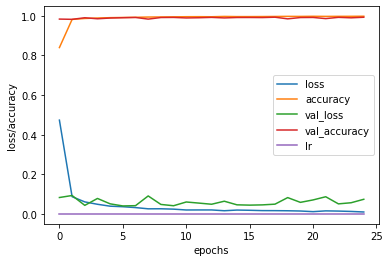

In [255]:
pd.DataFrame(model_001_history.history).plot()
plt.ylabel("loss/accuracy")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

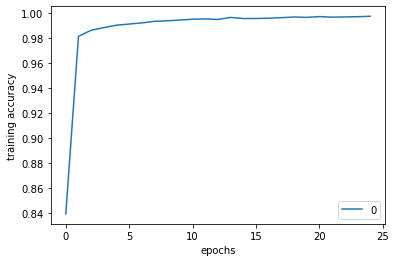

In [256]:
pd.DataFrame(model_001_history.history['accuracy']).plot()
plt.ylabel("training accuracy")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

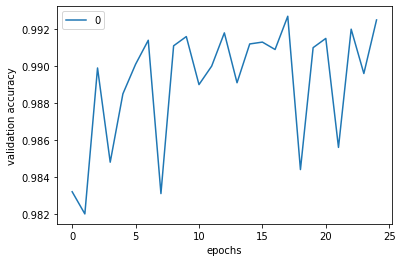

In [257]:
pd.DataFrame(model_001_history.history['val_accuracy']).plot()
plt.ylabel("validation accuracy")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

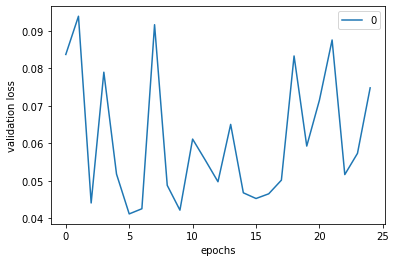

In [258]:
pd.DataFrame(model_001_history.history['val_loss']).plot()
plt.ylabel("validation loss")
plt.xlabel("epochs")

# Summary

- In this practice I found it challenging to get the above 99% that was achieved in the previous practice
    - I think this is because the test data was incorrect in the last practice. I had split the test data into test and validation data, without shuffling first. Today I just kept it as one and used the test for the validation as well.
    - I was still able to achieve >99% but after much tweaking of the architecture
- In a future practice I would like to store model checkpoints as the training occurs to preserve the best found models
- Additionally, it would be nice to try to generate more test data, by rotating the existing test data. Yesterday it seemed like some were not found because of rotation.